In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np

In [10]:
data = pd.DataFrame(pd.read_csv("/Users/hannatoenbreker/AAI/RTL-project/rtl/files/statistics/eval-whisper-large-v2-results-v2.txt", sep=';', header=0, names=['recording_id', 'speaker_id', 'component', 'group', 'age', 'gender', 'cef', 'dialect_region', 'res_place', 'birth_place', 'home_language_1', 'home_language_2', 'comment', 'education', 'education_place', 'lengh_stay', 'time_dutch_l2', 'duration', 'wer', 'cer']))
base = [[1, 0.353], [2, 0.184], [3,  0.551], [4, 0.569], [5, 0.242]]
baseline = pd.DataFrame(base, columns=['subgroup', 'baseline'])

result = []
for index, d in data.iterrows(): 
    if d['group'] == 1:
        result.append(0.353)
    elif d['group'] == 2:
        result.append(0.184)
    elif d['group'] == 3:
        result.append(0.551)
    elif d['group'] == 4:
        result.append(0.569)
    else:
        result.append(0.242)
        
data["baseline"] = result  
data["above_baseline"] = np.where(data['wer'] < data['baseline'], 0, 1)
data.describe()

,group,age,education,duration,wer,cer,baseline,above_baseline
count,993.000000,945.000000,282.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,2.907351,30.160847,2.730496,415.833218,0.185524,0.105658,0.365584,0.107538
std,1.447842,27.434698,0.887873,153.858386,0.125416,0.096632,0.152918,0.309951
min,1.000000,6.000000,1.000000,88.896750,0.020431,0.007477,0.184000,0.000000
25%,2.000000,11.000000,2.000000,314.281450,0.093602,0.048192,0.242000,0.000000
50%,3.000000,15.000000,2.000000,385.850813,0.156393,0.080420,0.353000,0.000000
75%,4.000000,44.000000,4.000000,470.341700,0.240000,0.136029,0.551000,0.000000
max,5.000000,96.000000,4.000000,1772.754400,0.998893,0.988764,0.569000,1.000000


  component  above_baseline  count
0    comp-p               0    395
1    comp-p               1     98
2    comp-q               0    493
3    comp-q               1      9


<Axes: xlabel='component', ylabel='Count'>

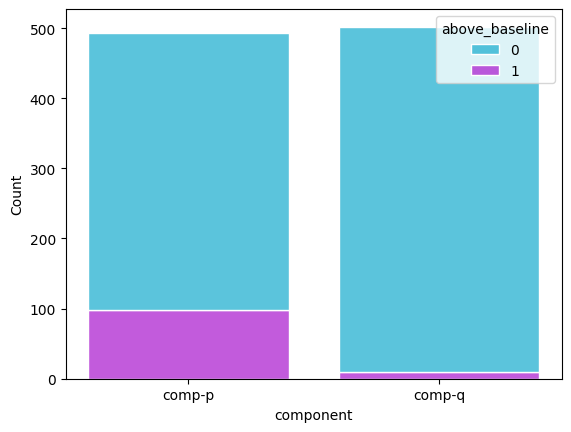

In [110]:
 # creating the bar plot
import seaborn as sns

bars = data.groupby(['component', 'above_baseline'])['component'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='component', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that comp-p has more bias than comp-q

In [11]:
comp_p = data.loc[data['component'] == 'comp-p']
comp_q = data.loc[data['component'] == 'comp-q']

/var/folders/kn/lstrnwnx2mq7zv4l62f5_qw00000gn/T/ipykernel_3988/2335871671.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kn/lstrnwnx2mq7zv4l62f5_qw00000gn/T/ipykernel_3988/2335871671.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kn/lstrnwnx2mq7zv4l62f5_qw00000gn/T/ipykernel_3988/2335871671.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<Axes: >

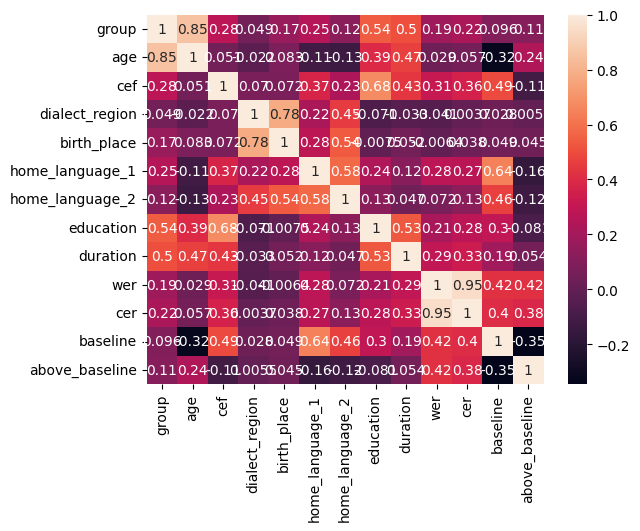

In [149]:
# create dummy data
comp_p['education'] = pd.factorize(comp_p['education'])[0]
comp_p['dialect_region'] = pd.factorize(comp_p['dialect_region'])[0]
comp_p['home_language_1'] = pd.factorize(comp_p['home_language_1'])[0]
comp_p['home_language_2'] = pd.factorize(comp_p['home_language_2'])[0]
comp_p['cef'] = pd.factorize(comp_p['cef'])[0]
comp_p['birth_place'] = pd.factorize(comp_p['birth_place'])[0]

sns.heatmap(comp_p.corr(), annot=True)

   dialect_region  above_baseline  count
0             FL1               0     67
1             FL1               1     11
2             FL2               0     67
3             FL2               1      9
4             FL3               0    108
5             FL3               1     14
6             FL4               0     51
7             FL4               1      8
8             N1b               0     65
9             N1b               1     11
10            N2c               0     89
11            N2c               1     11
12            N3b               0    105
13            N3b               1     13
14            N4a               0    277
15            N4a               1     29


<Axes: xlabel='dialect_region', ylabel='Count'>

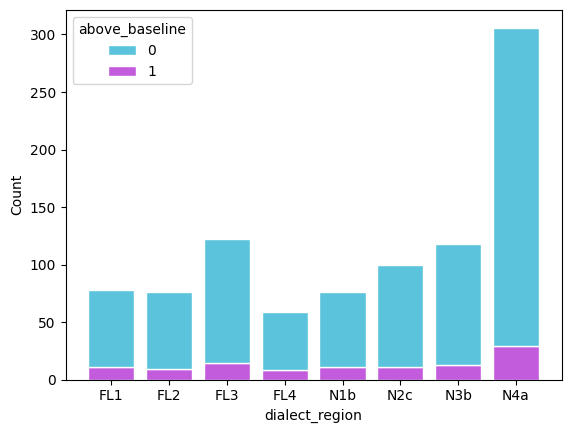

In [138]:
 # creating the bar plot
import seaborn as sns

bars = data.groupby(['dialect_region', 'above_baseline'])['dialect_region'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='dialect_region', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that 

   dialect_region  above_baseline  count
0             FL1               0     37
1             FL1               1      2
2             FL2               0     38
3             FL3               0     59
4             FL3               1      2
5             FL4               0     32
6             FL4               1      1
7             N1b               0     38
8             N2c               0     50
9             N3b               0     58
10            N3b               1      1
11            N4a               0    150
12            N4a               1      3


<Axes: xlabel='dialect_region', ylabel='Count'>

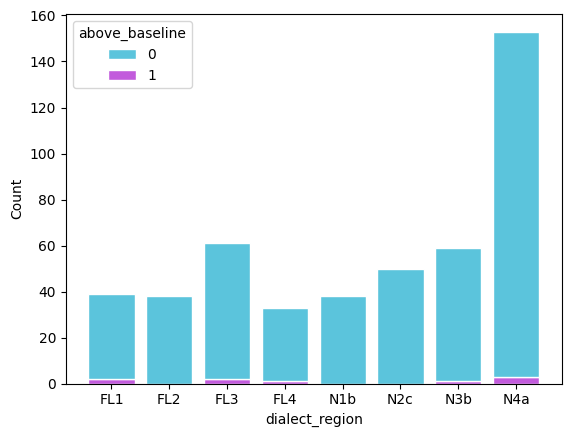

In [142]:
# creating the bar plot
import seaborn as sns

bars = comp_q.groupby(['dialect_region', 'above_baseline'])['dialect_region'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='dialect_region', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that 

   dialect_region  above_baseline  count
0             FL1               0     30
1             FL1               1      9
2             FL2               0     29
3             FL2               1      9
4             FL3               0     49
5             FL3               1     12
6             FL4               0     19
7             FL4               1      7
8             N1b               0     27
9             N1b               1     11
10            N2c               0     39
11            N2c               1     11
12            N3b               0     47
13            N3b               1     12
14            N4a               0    127
15            N4a               1     26


<Axes: xlabel='dialect_region', ylabel='Count'>

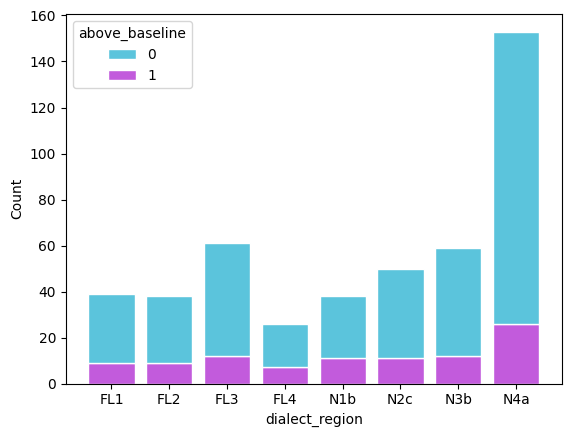

In [144]:
 # creating the bar plot
import seaborn as sns

bars = comp_p.groupby(['dialect_region', 'above_baseline'])['dialect_region'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='dialect_region', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that 

   group  above_baseline  count
0    1.0               0    110
1    1.0               1      3
2    2.0               0    105
3    2.0               1      1
4    3.0               0    103
5    3.0               1      1
6    4.0               0     72
7    4.0               1      1
8    5.0               0    102
9    5.0               1      3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:416: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



<Axes: xlabel='group', ylabel='Count'>

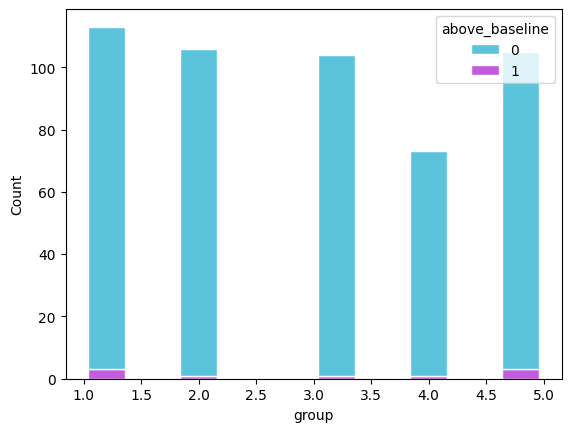

In [140]:
# creating the bar plot
import seaborn as sns

bars = comp_q.groupby(['group', 'above_baseline'])['group'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='group', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that 

   group  above_baseline  count
0    1.0               0    100
1    1.0               1     10
2    2.0               0     65
3    2.0               1     40
4    3.0               0     95
5    3.0               1      5
6    4.0               0     68
7    4.0               1      4
8    5.0               0     66
9    5.0               1     39


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:416: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



<Axes: xlabel='group', ylabel='Count'>

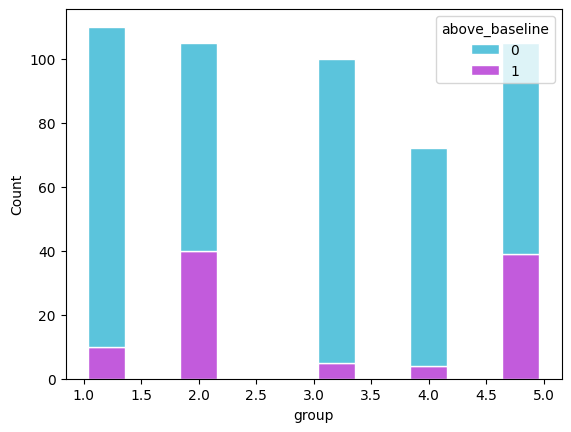

In [141]:
# creating the bar plot
import seaborn as sns

bars = comp_p.groupby(['group', 'above_baseline'])['group'].count().reset_index(name="count")
print(bars)
sns.histplot(bars, x='group', weights='count', hue='above_baseline', multiple='stack', palette=['#24b1d1', '#ae24d1'],edgecolor='white',shrink=0.8)

# from this vizualisation we can conclude that 

In [114]:
def show_boxplots(component):
    fig = px.box(component, x='group', y="wer", color="gender", hover_data=['age', 'gender', 'cef', 'dialect_region', 'res_place', 'birth_place', 'home_language_1', 'home_language_2', 'education', 'education_place', 'lengh_stay', 'time_dutch_l2', 'duration', 'wer', 'cer'])
    fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[0.353, 0.184, 0.551, 0.569, 0.242], mode='lines'))
    return fig.show()

In [115]:
def get_outliers(subgroup, component):
    df = component.loc[component['group'] == subgroup]
    Q1=df['wer'].quantile(0.25)
    Q3=df['wer'].quantile(0.75)
    IQR=Q3-Q1
    df_final = df.loc[(df['wer']< (Q1-1.5*IQR)) | (df['wer'] > (Q3+1.5*IQR))]
    return df_final

In [116]:
def print_outliers(outliers, component, function_name):
    for n in range(1, 6):
        outliers.append(function_name(n, component))
    
    outliers = pd.concat(outliers)
    outliers.head(25)
    return pd.DataFrame(outliers)

In [117]:
def show_table(df):       
    fig = go.Figure(data=[go.Table(
        header=dict(values=['Age', 'WER', 'CER'],
                fill_color='paleturquoise',
                align='left'),
        cells=dict(values=[df.age, df.wer, df.cer],
               fill_color='lavender',
               align='left'))
    ])

    return fig.show()

In [118]:
base = [[1, 0.353], [2, 0.184], [3,  0.551], [4, 0.569], [5, 0.242]]
baseline = pd.DataFrame(base, columns=['subgroup', 'baseline'])

def get_audio_above_baseline(subgroup, component):
    group = component.loc[component['group'] == subgroup]
    baseline_val = baseline.loc[baseline['subgroup'] == subgroup, 'baseline'].iloc[0]
    above_baseline = pd.DataFrame(group.loc[group['wer'] > baseline_val])
    return above_baseline

In [119]:
list_outliers = print_outliers([], comp_p, get_outliers)

In [120]:
show_boxplots(comp_p)

In [121]:
show_boxplots(comp_q)

In [122]:
def analyse_data(list_outliers, subgroup, column):
    list_outliers.head(25)
    group = list_outliers.loc[list_outliers['group'].isin(subgroup)]
    group_column = group[column].value_counts().reset_index()
    return group_column

In [123]:
above_baseline = print_outliers([], comp_p, get_audio_above_baseline)

  index  dialect_region
0   N4a              26
1   N3b              12
2   FL3              12
3   N2c              11
4   N1b              11
5   FL1               9
6   FL2               9
7   FL4               7


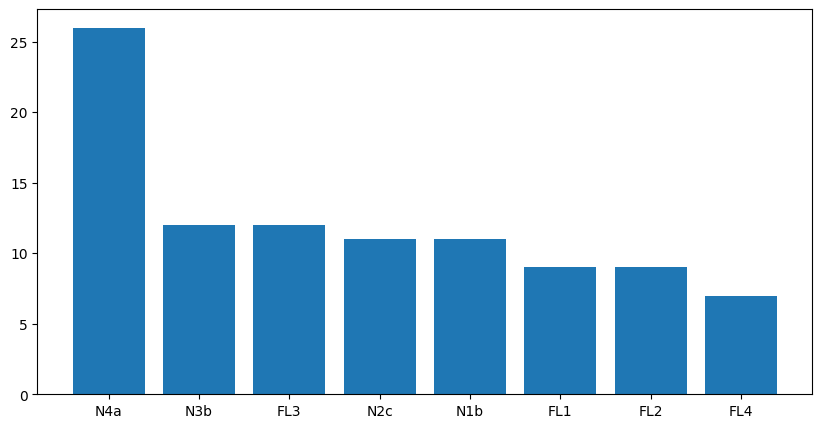

In [124]:
def show_dialects():
    dialects_above_baseline = above_baseline['dialect_region'].value_counts().reset_index()
    plt.figure(figsize = (10, 5))
    print(dialects_above_baseline)
 
    # creating the bar plot
    plt.bar(dialects_above_baseline['index'], dialects_above_baseline['dialect_region'])
    return plt.show()

show_dialects()

In [126]:
# Group 1: Results show only females
analyse_data(list_outliers, [1], 'gender')
# Group 2: Genders are equal and no dialect that takes over. Duration is not above the average of durations of the audio's, also not as outliers
# Half of them are dutch speakers, However, we can see that the dialect regions are mostly from brabant and flemish, so the dialect plays a bigger role here
analyse_data(list_outliers, [2], 'dialect_region')
# Group 3: We can see that the dialect regions are from brabant, also that the home language is french, So probably with a french accent
analyse_data(list_outliers, [3], 'home_language_1')
# Group 4 moslty don't control dutch language (cef is not high)
analyse_data(list_outliers, [4], 'cef')

#tables

,index,cef
0,A1,2
1,A2,1
2,B2,1


  dialect_region  count
0            FL1      2
1            FL3      2
2            FL4      1
3            N3b      1
4            N4a      3


([<matplotlib.patches.Wedge at 0x13e5738b0>,
 [Text(0.8426488837530798, 0.70706637503822, 'FL1'),
  Text(-0.5500000148652439, 0.9526279355804298, 'FL3'),
  Text(-1.0999999999999999, -2.5747358288378247e-08, 'FL4'),
  Text(-0.8426488672029966, -0.7070663947618405, 'N3b'),
  Text(0.5500000594609757, -0.9526279098330698, 'N4a')])

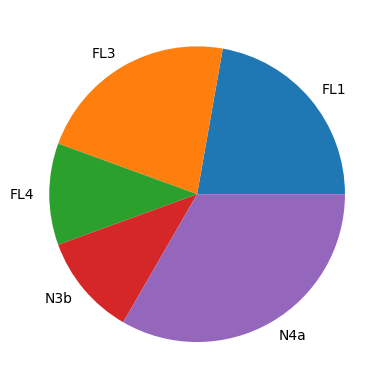

In [137]:
dialect_total = comp_q.loc[comp_q['above_baseline'] == 1].groupby(['dialect_region'])['dialect_region'].count().reset_index(name='count')
print(dialect_total)
plt.pie(x=dialect_total['count'], labels=dialect_total['dialect_region'])

In [17]:
def get_ratio(outlier_list, value, column, component_list):
    return (outlier_list[value] / len(component_list.loc[component_list[column] == value])) * 100

In [18]:
print("The amount of audio's above the baseline per dialect region compared to the total amount of audio's with this dialect (ratio)")
for dialect in dialect_total.index.to_list():
    print(str(dialect) + ": " + str(get_ratio(dialect_total, dialect, 'dialect_region', comp_p)))

The amount of audio's above the baseline per dialect region compared to the total amount of audio's with this dialect (ratio)
N4a: 16.99346405228758
N3b: 20.33898305084746
FL3: 19.672131147540984
N2c: 22.0
N1b: 28.947368421052634
FL1: 23.076923076923077
FL2: 23.684210526315788
FL4: 26.923076923076923


In [12]:
 # SUBGROUPS:
    # GROUP 1: native children aged 7-11 (DC)
    # GROUP 2: native children aged 12-16 (DT)
    # GROUP 3: non-native children (NNC)
    # GROUP 4: non-native adults (NNA)
    # GROUP 5: native adults above 65 (DOA)
print(data[['duration', 'group']].groupby('group').sum())

           duration
group              
1.0    82873.023529
2.0    68471.953715
3.0    79155.412004
4.0    83684.486862
5.0    98706.241740


In [13]:
print(comp_p[['duration', 'group']].groupby('group').sum())

           duration
group              
1.0    37348.053363
2.0    28842.540165
3.0    32846.806466
4.0    42446.823762
5.0    53390.454052


In [14]:
print(comp_q[['duration', 'group']].groupby('group').sum())

           duration
group              
1.0    45524.970166
2.0    39629.413550
3.0    46308.605538
4.0    41237.663100
5.0    45315.787688


## Conclusion
### GROUP 1: native children aged 7-11 (DC)
### GROUP 2: native children aged 12-16 (DT)
### GROUP 3: non-native children (NNC)
### GROUP 4: non-native adults (NNA)
### GROUP 5: native adults above 65 (DOA)

 

#### Comp-p & comp-q

group   duration              hours

1.0        82873.023529   23

2.0       68471.953715    19

3.0       79155.412004    22

4.0       83684.486862  23

5.0       98706.241740    27

 

**natives total: 69 hours**

**non-natives total: 45 hours**

 

#### Comp-p

Group duration              hours

1.0       37348.053363   10

2.0      28842.540165    8

3.0      32846.806466   9

4.0      42446.823762   12

5.0      53390.454052   15

 

**natives total: 23 hours**

**non-natives total: 21 hours**

 

#### Comp-q

Group duration               hours

1.0       45524.970166    13

2.0      39629.413550    11

3.0      46308.605538   13

4.0      41237.663100     11

5.0      45315.787688    12

 

**natives total: 36 hours**

**non-natives total: 24 hours**